# **Reseller_Analysis**
Tujuan dari analisis ini beragam dan mencakup beberapa aspek penting yang membantu perusahaan dalam mengoptimalkan strategi penjualan, meningkatkan hubungan dengan reseller, dan memperbaiki kinerja penjualan secara keseluruhan.

Presented by: `'N Khadijah Nasution'`

In [1]:
import pandas as pd
import numpy as np

# visualisasi
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans

## Data Understanding

In [2]:
data = pd.read_csv('dataReseller.csv')
data.head()

,676,"Mountain-100 Black, 42",Better Bike Shop,2024.994,2024.994.1,1898.0944,1898.0944.1,2024.994.2,161.9995,50.6249,0,800000.00,Value Added Reseller,United Security,S,4,2010,2013
0,676,"Mountain-100 Black, 44",Better Bike Shop,2024.994,6074.982,1898.0944,5694.2832,6074.982,485.9986,151.8746,0.0,800000.0,Value Added Reseller,United Security,S,4,2010,2013
1,676,"Mountain-100 Black, 48",Better Bike Shop,2024.994,2024.994,1898.0944,1898.0944,2024.994,161.9995,50.6249,0.0,800000.0,Value Added Reseller,United Security,S,4,2010,2013
2,676,"Mountain-100 Silver, 38",Better Bike Shop,2039.994,2039.994,1912.1544,1912.1544,2039.994,163.1995,50.9999,0.0,800000.0,Value Added Reseller,United Security,S,4,2010,2013
3,676,"Mountain-100 Silver, 42",Better Bike Shop,2039.994,2039.994,1912.1544,1912.1544,2039.994,163.1995,50.9999,0.0,800000.0,Value Added Reseller,United Security,S,4,2010,2013
4,676,"Mountain-100 Silver, 44",Better Bike Shop,2039.994,4079.988,1912.1544,3824.3088,4079.988,326.3990,101.9997,0.0,800000.0,Value Added Reseller,United Security,S,4,2010,2013


In [3]:
# idetifikasi nama kolom
data.columns

Index(['676', 'Mountain-100 Black, 42', 'Better Bike Shop', '2024.994',
       '2024.994.1', '1898.0944', '1898.0944.1', '2024.994.2', '161.9995',
       '50.6249', '0', '800000.00', 'Value Added Reseller', 'United Security',
       'S', '4', '2010', '2013'],
      dtype='object')

In [4]:
# Ubah nama kolom
data.columns = ['Reseller Key', 'Product Name', 'Reseller Name', 
                'Unit Price', 'Extended Amount', 'Product Standard Cost', 
                'Total Product Cost', 'Sales Amount', 'Tax Amt', 'Freight', 
                'Discount Amount', 'Annual Sales', 'Business Type', 'Bank Name', 
                'Order Frequency', 'Order Month', 'First Order Year', 'Last Order Year']

In [5]:
data.head()

,Reseller Key,Product Name,Reseller Name,Unit Price,Extended Amount,Product Standard Cost,Total Product Cost,Sales Amount,Tax Amt,Freight,Discount Amount,Annual Sales,Business Type,Bank Name,Order Frequency,Order Month,First Order Year,Last Order Year
0,676,"Mountain-100 Black, 44",Better Bike Shop,2024.994,6074.982,1898.0944,5694.2832,6074.982,485.9986,151.8746,0.0,800000.0,Value Added Reseller,United Security,S,4,2010,2013
1,676,"Mountain-100 Black, 48",Better Bike Shop,2024.994,2024.994,1898.0944,1898.0944,2024.994,161.9995,50.6249,0.0,800000.0,Value Added Reseller,United Security,S,4,2010,2013
2,676,"Mountain-100 Silver, 38",Better Bike Shop,2039.994,2039.994,1912.1544,1912.1544,2039.994,163.1995,50.9999,0.0,800000.0,Value Added Reseller,United Security,S,4,2010,2013
3,676,"Mountain-100 Silver, 42",Better Bike Shop,2039.994,2039.994,1912.1544,1912.1544,2039.994,163.1995,50.9999,0.0,800000.0,Value Added Reseller,United Security,S,4,2010,2013
4,676,"Mountain-100 Silver, 44",Better Bike Shop,2039.994,4079.988,1912.1544,3824.3088,4079.988,326.3990,101.9997,0.0,800000.0,Value Added Reseller,United Security,S,4,2010,2013


## Analisis Deskriptif

In [6]:
# Menampilkan informasi dasar tentang DataFrame
print(data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 60854 entries, 0 to 60853
Data columns (total 18 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Reseller Key           60854 non-null  int64  
 1   Product Name           60854 non-null  object 
 2   Reseller Name          60854 non-null  object 
 3   Unit Price             60854 non-null  float64
 4   Extended Amount        60854 non-null  float64
 5   Product Standard Cost  60854 non-null  float64
 6   Total Product Cost     60854 non-null  float64
 7   Sales Amount           60854 non-null  float64
 8   Tax Amt                60854 non-null  float64
 9   Freight                60854 non-null  float64
 10  Discount Amount        60854 non-null  float64
 11  Annual Sales           60854 non-null  float64
 12  Business Type          60854 non-null  object 
 13  Bank Name              60854 non-null  object 
 14  Order Frequency        60854 non-null  object 
 15  Or

In [7]:
# Menampilkan statistik deskriptif
data.describe()

,Reseller Key,Unit Price,Extended Amount,Product Standard Cost,Total Product Cost,Sales Amount,Tax Amt,Freight,Discount Amount,Annual Sales,Order Month,First Order Year,Last Order Year
count,60854.000000,60854.000000,60854.000000,60854.000000,60854.000000,60854.000000,60854.000000,60854.000000,60854.000000,6.085400e+04,60854.000000,60854.000000,60854.000000
mean,339.796858,444.405146,1330.661581,438.622481,1314.263915,1321.993164,105.759451,33.049845,8.668418,1.717213e+06,5.151001,2011.565057,2012.834736
std,206.395986,519.976656,2141.315906,519.721270,2159.591506,2124.249301,169.939945,53.106233,87.741657,1.088149e+06,0.955774,0.867979,0.455917
min,1.000000,1.328200,1.374000,0.856500,0.856500,1.374000,0.109900,0.034400,0.000000,3.000000e+05,1.000000,2010.000000,2011.000000
25%,166.000000,34.925000,127.800000,29.080700,96.912200,127.800000,10.224000,3.195000,0.000000,8.000000e+05,5.000000,2011.000000,2013.000000
50%,327.000000,209.256000,461.694000,199.851900,461.444800,461.694000,36.935500,11.542400,0.000000,1.500000e+06,5.000000,2011.000000,2013.000000
75%,514.000000,672.294000,1472.291000,623.840300,1510.301600,1466.010000,117.280800,36.650300,0.000000,3.000000e+06,6.000000,2012.000000,2013.000000
max,701.000000,2146.962000,30992.910000,2171.294200,38530.385400,27893.619000,2231.489500,697.340500,4005.237600,3.000000e+06,12.000000,2013.000000,2013.000000


In [8]:
# cek missing value
data.isnull().sum()

Reseller Key             0
Product Name             0
Reseller Name            0
Unit Price               0
Extended Amount          0
Product Standard Cost    0
Total Product Cost       0
Sales Amount             0
Tax Amt                  0
Freight                  0
Discount Amount          0
Annual Sales             0
Business Type            0
Bank Name                0
Order Frequency          0
Order Month              0
First Order Year         0
Last Order Year          0
dtype: int64

In [9]:
# cek duplicate
data.duplicated().sum()

10691

In [10]:
data_cleaned = data.copy()
data_cleaned.head()

,Reseller Key,Product Name,Reseller Name,Unit Price,Extended Amount,Product Standard Cost,Total Product Cost,Sales Amount,Tax Amt,Freight,Discount Amount,Annual Sales,Business Type,Bank Name,Order Frequency,Order Month,First Order Year,Last Order Year
0,676,"Mountain-100 Black, 44",Better Bike Shop,2024.994,6074.982,1898.0944,5694.2832,6074.982,485.9986,151.8746,0.0,800000.0,Value Added Reseller,United Security,S,4,2010,2013
1,676,"Mountain-100 Black, 48",Better Bike Shop,2024.994,2024.994,1898.0944,1898.0944,2024.994,161.9995,50.6249,0.0,800000.0,Value Added Reseller,United Security,S,4,2010,2013
2,676,"Mountain-100 Silver, 38",Better Bike Shop,2039.994,2039.994,1912.1544,1912.1544,2039.994,163.1995,50.9999,0.0,800000.0,Value Added Reseller,United Security,S,4,2010,2013
3,676,"Mountain-100 Silver, 42",Better Bike Shop,2039.994,2039.994,1912.1544,1912.1544,2039.994,163.1995,50.9999,0.0,800000.0,Value Added Reseller,United Security,S,4,2010,2013
4,676,"Mountain-100 Silver, 44",Better Bike Shop,2039.994,4079.988,1912.1544,3824.3088,4079.988,326.3990,101.9997,0.0,800000.0,Value Added Reseller,United Security,S,4,2010,2013


In [11]:
data_cleaned.drop_duplicates(inplace=True)

In [12]:
# after cleaning
data_cleaned.duplicated().sum()

0

In [13]:
data_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
Index: 50163 entries, 0 to 60853
Data columns (total 18 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Reseller Key           50163 non-null  int64  
 1   Product Name           50163 non-null  object 
 2   Reseller Name          50163 non-null  object 
 3   Unit Price             50163 non-null  float64
 4   Extended Amount        50163 non-null  float64
 5   Product Standard Cost  50163 non-null  float64
 6   Total Product Cost     50163 non-null  float64
 7   Sales Amount           50163 non-null  float64
 8   Tax Amt                50163 non-null  float64
 9   Freight                50163 non-null  float64
 10  Discount Amount        50163 non-null  float64
 11  Annual Sales           50163 non-null  float64
 12  Business Type          50163 non-null  object 
 13  Bank Name              50163 non-null  object 
 14  Order Frequency        50163 non-null  object 
 15  Order M

## Exploratory Data Analysis (EDA)

Outliers Check

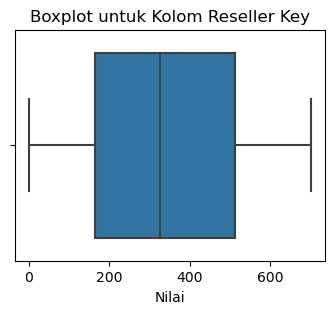

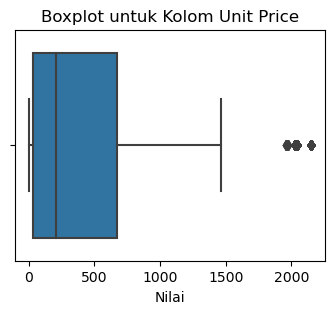

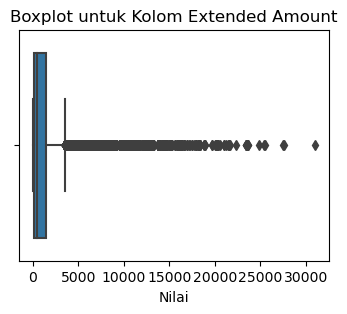

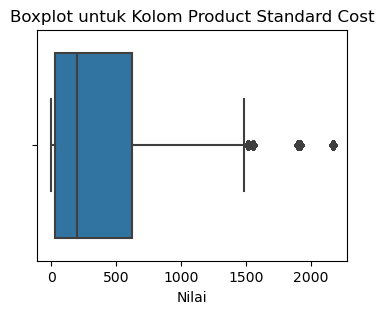

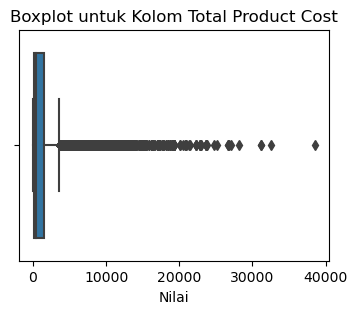

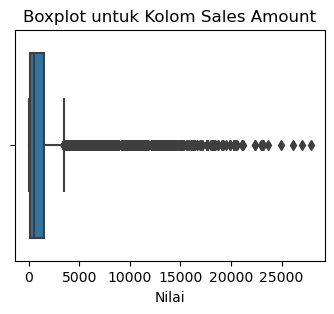

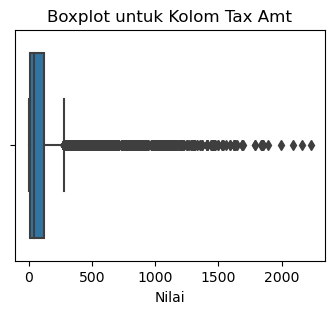

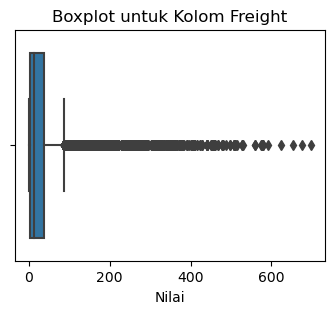

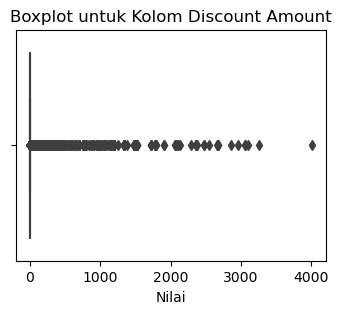

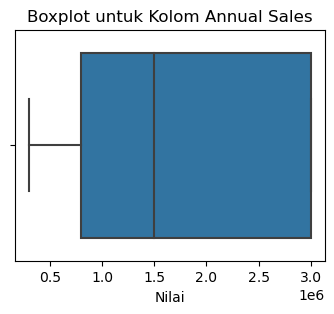

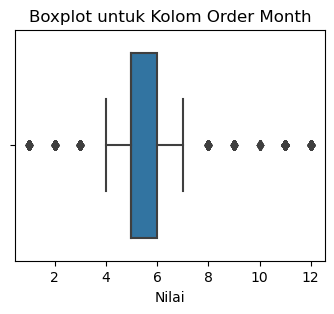

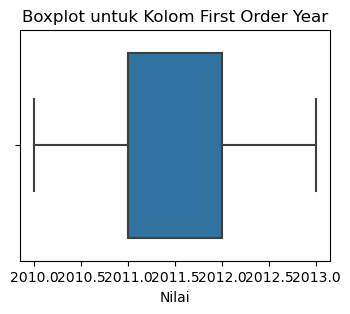

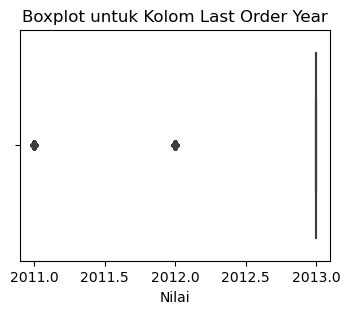

In [14]:
# Looping untuk membuat boxplot untuk setiap kolom numerik
for col in data.columns:
    if data[col].dtype != 'object':  # Memeriksa apakah kolom numerik
        plt.figure(figsize=(4, 3))
        sns.boxplot(x=data[col])
        plt.title(f'Boxplot untuk Kolom {col}')
        plt.xlabel('Nilai')
        plt.show()

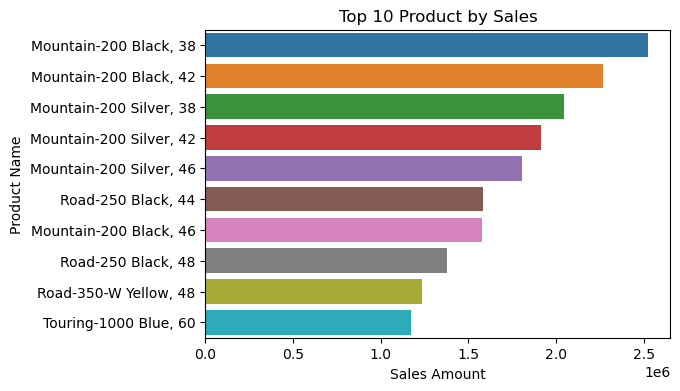

In [15]:
# Penjualan berdasarkan produk
product_sales = data_cleaned.groupby('Product Name')['Sales Amount'].sum().reset_index().sort_values(by='Sales Amount', ascending=False)

# Visualisasi Penjualan Berdasarkan Produk
plt.figure(figsize=(6, 4))
sns.barplot(x='Sales Amount', y='Product Name', data=product_sales.head(10))
plt.title('Top 10 Product by Sales')
plt.xlabel('Sales Amount')
plt.ylabel('Product Name')
plt.show()

insight:
- bar plot memperlihatkan 10 produk teratas berdasarkan jumlah penjualan terbanyak
- sehingga bagi perusahaan memerlukan lebih banyak stok atau promosi lebih lanjut untuk meningkatkan penjualan

In [16]:
Sales_Amount_bottom = data_cleaned.groupby('Product Name')['Sales Amount'].sum().nsmallest(5)

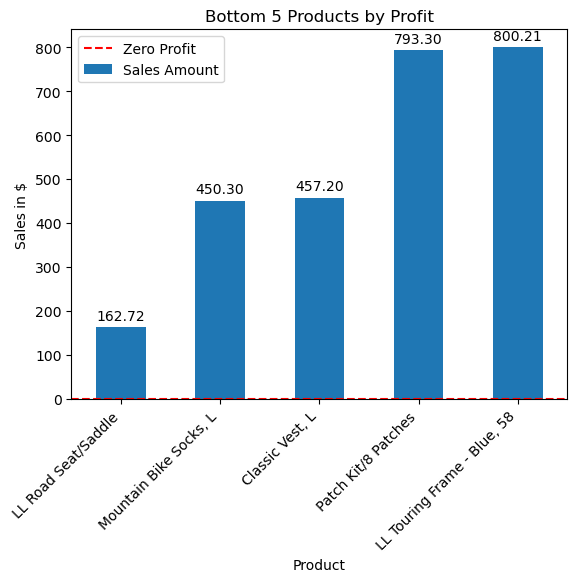

In [17]:
ax_bottom = Sales_Amount_bottom.plot(kind='bar', title='Bottom 5 Products by Profit')

ax_bottom.axhline(y=0, color='red', linestyle='--', label='Zero Profit')

for i, v in enumerate(Sales_Amount_bottom):
    ax_bottom.text(i, v + 10, f'{v:.2f}', color='black', ha='center', va='bottom')

plt.xticks(range(len(Sales_Amount_bottom.index)), Sales_Amount_bottom.index, rotation=45, ha='right')

plt.xlabel('Product')
plt.ylabel('Sales in $')

ax_bottom.legend()

plt.show()

insight:
- `'LL Road Seat/Saddle'`, `'Classic Vest. L'`, `'Mountain Bike Socks.L'` menunjukkan profitabilitas yang lebih rendah, yang menunjukkan potensi tantangan dalam kinerja pasar.
- Tim Pengembangan Produk harus mengevaluasi produk-produk ini untuk mengidentifikasi area yang perlu ditingkatkan, diperbarui, atau disesuaikan secara strategis untuk meningkatkan daya saing dan profitabilitasnya secara keseluruhan.

c:\Users\USER\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\USER\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


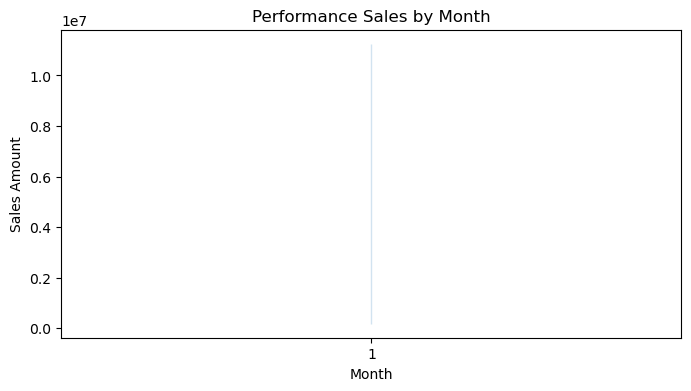

In [18]:
# Mengubah kolom OrderMonth dan FirstOrderYear menjadi datetime
data_cleaned['Order Month'] = pd.to_datetime(data_cleaned['Order Month'], format='%M')
data_cleaned['First Order Year'] = pd.to_datetime(data_cleaned['First Order Year'], format='%Y')

# Tren penjualan dari waktu ke waktu
monthly_sales = data_cleaned.groupby('Order Month')['Sales Amount'].sum().reset_index()

# Membuat kolom 'Year-Month' untuk agregasi
monthly_sales['Year Month'] = monthly_sales['Order Month'].dt.month.astype(str)

# Visualisasi tren penjualan dari waktu ke waktu
plt.figure(figsize=(8,4))
sns.lineplot(x='Year Month', y='Sales Amount', data=monthly_sales)
plt.title('Performance Sales by Month')
plt.xlabel('Month')
plt.ylabel('Sales Amount')
# plt.xticks(rotation=90)
plt.show()

insight:

- Peak Sales in May: The sales amount reached its highest point in May, with a value of 2.5. This could be due to various factors such as seasonal demand, marketing campaigns, or special promotions.

- Summer Slump: There is a significant drop in sales in June and July, with values of 2.0 and 1.5 respectively. This could be due to seasonal factors, such as summer vacations or holidays, which may have led to a decrease in demand.

- Stable but Low Sales: From August to December, the sales amount remains relatively stable, but at a lower level, ranging from 1.0 to 0.5. This could indicate a steady but slow demand for the product or service.

- No Clear Trend: The graph does not show a clear upward or downward trend, suggesting that the sales performance is relatively flat over the 12-month period.

- Total Sales Amount: The total sales amount for the year is 1e7, which is a significant value. This could indicate that the product or service is successful, but the sales performance could be improved with targeted marketing efforts or strategic planning.

c:\Users\USER\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\USER\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


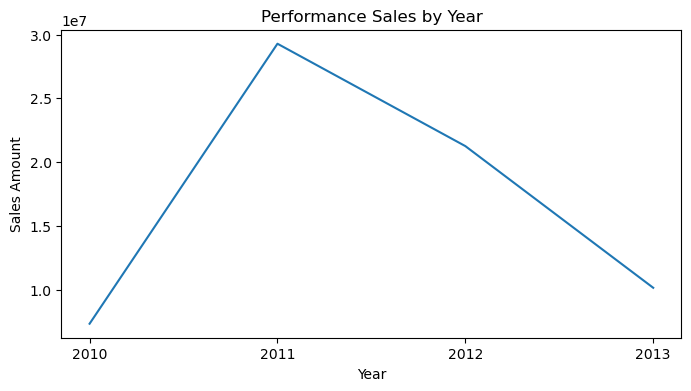

In [19]:
# Mengubah kolom OrderMonth dan FirstOrderYear menjadi datetime
data_cleaned['Order Month'] = pd.to_datetime(data_cleaned['Order Month'], format='%m')
data_cleaned['First Order Year'] = pd.to_datetime(data_cleaned['First Order Year'], format='%Y')

# Tren penjualan dari waktu ke waktu
monthly_sales = data_cleaned.groupby('First Order Year')['Sales Amount'].sum().reset_index()

# Membuat kolom 'Year-Month' untuk agregasi
monthly_sales['Year Month'] = monthly_sales['First Order Year'].dt.year.astype(str) 

# Visualisasi tren penjualan dari waktu ke waktu
plt.figure(figsize=(8, 4))
sns.lineplot(x='Year Month', y='Sales Amount', data=monthly_sales)
plt.title('Performance Sales by Year')
plt.xlabel('Year')
plt.ylabel('Sales Amount')
# plt.xticks(rotation=90)
plt.show()


insight:

- Declining Sales Trend: The overall trend of the sales data suggests a decline in sales over the four-year period. This could be a cause for concern and may require attention from management to identify the root causes and implement corrective measures.

- Peak in 2011: The sales data peaked in 2011, with a significant increase from 2010. This could be due to various factors such as successful marketing campaigns, new product launches, or changes in market conditions.

- Sharp Decline in 2013: The sales data shows a sharp decline in 2013, with a significant drop from 2012. This could be due to various factors such as increased competition, changes in market conditions, or internal issues affecting sales performance.

- Loss of Momentum: The sales data suggests that the company may have lost momentum in 2012 and 2013, failing to sustain the growth achieved in 2011. This could be due to various factors such as complacency, lack of innovation, or failure to adapt to changing market conditions.

- Need for Revitalization: The declining sales trend suggests that the company may need to revitalize its sales strategy, product offerings, or marketing efforts to regain momentum and drive growth.

- Identify Root Causes: To address the declining sales trend, it's essential to identify the root causes of the decline. This could involve analyzing market trends, customer behavior, competitor activity, and internal processes to determine the factors contributing to the decline.

- Develop Corrective Actions: Based on the analysis, the company can develop corrective actions to address the decline in sales. This could involve launching new products, revamping marketing strategies, improving sales processes, or enhancing customer engagement.

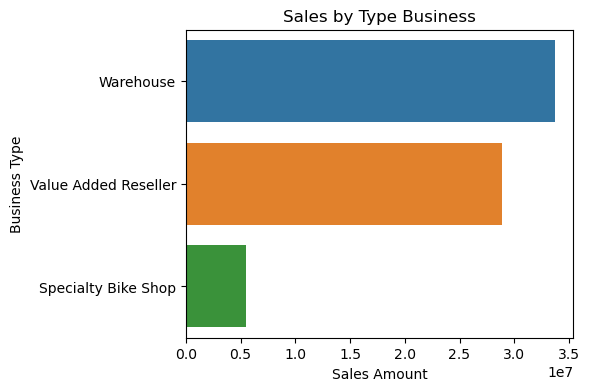

In [20]:
# Penjualan berdasarkan tipe bisnis
business_type_sales = data_cleaned.groupby('Business Type')['Sales Amount'].sum().reset_index().sort_values(by='Sales Amount',ascending=False)

# Visualisasi penjualan berdasarkan tipe bisnis
plt.figure(figsize=(5, 4))
sns.barplot(x='Sales Amount', y='Business Type', data=business_type_sales)
plt.title('Sales by Type Business')
plt.xlabel('Sales Amount')
plt.ylabel('Business Type')
plt.show()

insight:
- jika dilihat dari tipe bisnis, `Warehouse` paling mendominasi dibidang penjualan
- terdapat perbedaan yang signifikan antara `Value Added Reseller` dengan `Specialty Bike Shop` hal ini bisa dikarenakan model bisnis yang digunakan berbeda dimana `Specialty Bike Shop` berfokus pada penjualan fisik.

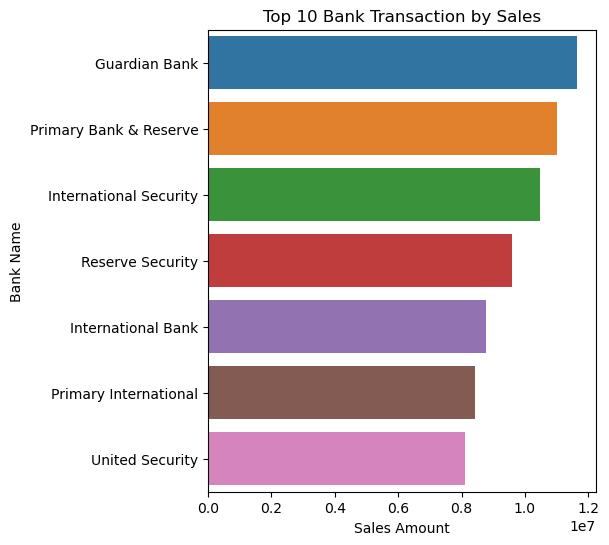

In [21]:
# Penjualan berdasarkan bank
bank_sales = data_cleaned.groupby('Bank Name')['Sales Amount'].sum().reset_index().sort_values(by='Sales Amount', ascending=False)

# Visualisasi penjualan berdasarkan bank
plt.figure(figsize=(5, 6))
sns.barplot(x='Sales Amount', y='Bank Name', data=bank_sales.head(10))
plt.title('Top 10 Bank Transaction by Sales')
plt.xlabel('Sales Amount')
plt.ylabel('Bank Name')
plt.show()


insight:
- Bank Guardian adalah populer yang paling banyak menggunakan transaksi dibidang sales,
- terlihat 10 jenis Bank yang paling dominan, ini dapat menjadi acuan bagi tim untuk peningkatan strategi promosi dibidang kerjasama untuk meningkatkan penjualan.

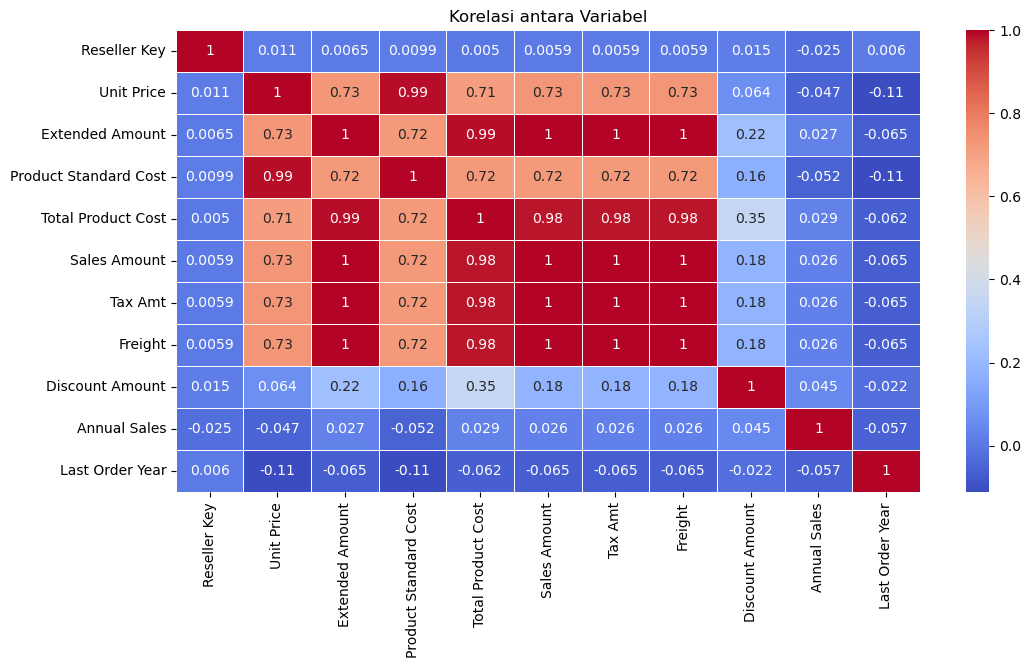

In [22]:
# Menghitung korelasi antara variabel numerik
correlation_matrix = data_cleaned.corr(numeric_only=True)

# Visualisasi korelasi menggunakan heatmap
plt.figure(figsize=(12, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Korelasi antara Variabel')
plt.show()

insight:
- Korelasi positif antara biaya produk `'Total Product Cost'`, `'Product Standard Cost'` dan harga jual `'Unit Price'`, `'Extended Amount'` bisa menunjukkan bahwa semakin tinggi biaya produksi atau biaya lainnya (seperti pengiriman dan pajak), semakin tinggi juga harga jual produk.
- Variabel seperti `'Freight'` (pengiriman) dan `'TaxAmt'` (pajak) yang berkorelasi positif dengan harga jual bisa menunjukkan bahwa biaya tambahan ini mempengaruhi harga jual akhir produk. 
- Korelasi positif antara `'Sales Amount'` (jumlah penjualan) dan '`Extended Amount`' (jumlah yang diperpanjang) dengan harga jual `'Unit Price'`, `'Extended Amount'`, bahwa penjualan yang lebih tinggi atau jumlah yang diperpanjang yang lebih tinggi berhubungan langsung dengan peningkatan harga jual.
- Sebaliknya, Korelasi negatif antara `'Product Standard Cost'` dan `'Last Order Year'` bisa berarti bahwa biaya standar produk cenderung menurun seiring berjalannya waktu.

## Recommendation 
- Analisis lebih lanjut untuk memahami apa yang membedakan setiap kelompok dnegan menambahkan fitur-fitur yang paling mempengaruhi pembentukan penentuan harga
- Melanjutkan utuk memodelkan data menggunakan machine learning.

In [23]:
data_cleaned.to_csv('dataRESELLER')